# Comparing results between AB and our own code without separating use and construction

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Results from AB
wind_ab = pd.read_csv("../ES_MOO_validation/AB_results/WT-2-MW_LCIA-results.csv")

In [3]:
from func import *

In [4]:
# Results from ecos_sep_constr_use
R_long_tot_constr = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_constr.csv")
R_long_tot_use = pd.read_csv(r"C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\results\R_long_tot_use.csv")
midpoint_categories, endpoint_categories_HH, endpoint_categories_EQ = impact_categories(R_constr=R_long_tot_constr, R_use=R_long_tot_use)

In [5]:
run pickle_reader_function.py

In [6]:
def plot_comparison_bis(df_comparison, save):
    plt.rcParams["axes.axisbelow"] = False
    plt.bar(x = np.linspace(0, df_comparison.shape[0], df_comparison.shape[0]),
            height=100*df_comparison.rel_error, tick_label = list(df_comparison["Impact category"]), alpha=0.50)
    plt.ylabel("Relative error [%]")
    plt.grid(visible=False)
    plt.xticks(rotation=90, va="bottom")
    plt.tick_params(axis="x",direction="in", pad=-10)
    if save:
        df_name = get_df_name(df=df_comparison)
        plt.savefig(f"pics/{df_name}.pdf", format="pdf")
    plt.show()

In [7]:
eco = read_pickle_file(r'C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\dataframes\ecospold2matrix\ecoinvent3.8.cut-offPandas_symmNorm_MA.gz.pickle')

In [8]:
eco_A = eco['A']
eco_A = eco_A.fillna(0)
display(eco_A)

index,2565980c-9db0-480c-85c2-08a51f35390f_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,447b52c3-fb20-495c-ade2-2b79c8ac130e_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,b6ffce87-425f-4fb5-9456-a22c1e677ec6_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,b8a3ca13-9b30-4971-9809-bfe00449eb49_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,e5760adb-d2f0-4baa-a85a-2b8473ebaf3d_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,dfa5f12d-7f3c-4b98-ae94-cc56c6f70d89_a235b2ff-3237-44b0-a445-b852376a1939,dfa5f12d-7f3c-4b98-ae94-cc56c6f70d89_d7f544d6-c372-4fc3-81ae-44aa3614c9fc,af76617f-978e-426e-a13e-d38e599dcc80_a235b2ff-3237-44b0-a445-b852376a1939,af76617f-978e-426e-a13e-d38e599dcc80_d7f544d6-c372-4fc3-81ae-44aa3614c9fc,0de236c4-00c9-4d77-80e0-0aacbc359e08_692b4f7e-9e79-4f69-b22f-b66f68f2f9cc,...,a8384a9d-660e-4b3c-95bf-278505b53fd3_fd27af60-7b68-4549-bf35-022eacd74f93,9210586d-b63c-4cd2-8539-81365d226883_ad38bbd2-e41c-4509-9dc3-c5c708a36606,95c3d53f-defc-4107-947d-244c9a6d57ec_2cb0d6c6-349c-46fc-b31f-a036c847a267,05c331cc-e200-4380-9d0a-d2cce6edb706_ce165995-6d94-44a8-ac3b-d5860c2c7fdb,b6c373ca-6cc9-409e-880f-5860dd1c0961_b3184435-d00c-5713-823d-5ff6741bfbbc,310fd9fe-8ad2-4be7-90fa-f8a784920210_d13ae29b-7d6a-55d2-8380-86343a80fed8,e55ecdcd-1c17-4ef3-9012-79de81a33742_ed25f589-c6c8-56a7-a518-b01dd3e8a453,b9b49ac3-e5df-4570-b274-714780d5467a_101e55f2-2da0-528b-96fd-21687e242c1c,b8f99db9-d2b9-44de-aad5-e6c6ea8ab784_451550a8-d9e6-4396-9f9a-97e752111228,789596da-02d0-4d28-8901-8736aa1bb122_5d15df3e-fa54-45d5-85c6-5e3f5b89b20e
index,,,,,,,,,,,,,,,,,,,,,
2565980c-9db0-480c-85c2-08a51f35390f_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
447b52c3-fb20-495c-ade2-2b79c8ac130e_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b6ffce87-425f-4fb5-9456-a22c1e677ec6_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b8a3ca13-9b30-4971-9809-bfe00449eb49_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e5760adb-d2f0-4baa-a85a-2b8473ebaf3d_3f6dada9-2497-4e1c-9e1b-eabafa6920f8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310fd9fe-8ad2-4be7-90fa-f8a784920210_d13ae29b-7d6a-55d2-8380-86343a80fed8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
e55ecdcd-1c17-4ef3-9012-79de81a33742_ed25f589-c6c8-56a7-a518-b01dd3e8a453,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
b9b49ac3-e5df-4570-b274-714780d5467a_101e55f2-2da0-528b-96fd-21687e242c1c,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
I = np.identity(len(eco['A']))
A_full =  I - eco_A

In [10]:
# IW+ file used by Justine, which probably has a few errors in it
# C_IW = pd.read_excel(r'C:\Users\matth\PycharmProjects\energyscope_moo\02_LCA\dataframes\impact_world_plus_2.0_ecoinvent_v38.xlsx')

# New IW+ file given by Maxime (4/7/2023)
C_IW = pd.read_excel("../ES_MOO_validation/dataframes/impact_world_plus_2.0_ecoinvent_v38_as_df.xlsx")

Impact_cat = C_IW['Impact category']
C_IW = C_IW.set_index(['Impact category','CF unit'])

In [12]:
df_eco_pro = pd.DataFrame.from_dict(eco['PRO'])
df_eco_pro = df_eco_pro[['activityName','geography','unitName']]

F_full = eco['F']
F_full = F_full.fillna(0)

df_eco_str = pd.DataFrame.from_dict(eco['STR'])
df_eco_str = df_eco_str[['id','name','comp','subcomp','unit']]

In [13]:
import time
start_time = time.time()
A_full_inv = pd.DataFrame.from_dict(np.linalg.inv(A_full))
#det = np.linalg.det(A_full_new)
print("--- %s seconds ---" % (time.time() - start_time))

--- 184.58475041389465 seconds ---


In [14]:
UUID_product_list = list(A_full.head(len(A_full)).index)

A_full_inv.columns = UUID_product_list
A_full_inv.index = UUID_product_list

In [15]:
import time
start_time = time.time()
Em = F_full.dot(A_full_inv)
print("--- %s seconds ---" % (time.time() - start_time))

--- 32.392253398895264 seconds ---


In [16]:
R = C_IW.dot(Em)
display(R)

2565980c-9db0-480c-85c2-08a51f35390f_3f6dada9-2497-4e1c-9e1b-eabafa6920f8  \
Impact category                               CF unit                                                                                            
Climate change, ecosystem quality, long term  PDF.m2.yr                                                   1.604860e-01                           
Climate change, ecosystem quality, short term PDF.m2.yr                                                   7.052705e-02                           
Climate change, human health, long term       DALY                                                        7.291738e-07                           
Climate change, human health, short term      DALY                                                        3.264981e-07                           
Climate change, long term                     kg CO2 eq (long)                                            3.895865e-01                           
Climate change, short term                    kg CO2 eq (short)                                           3.990464e-01                           
Fossil and nuclear energy use                 MJ deprived                                                 3.748525e+00                           
Freshwater acidification                      PDF.m2.yr                                                   7.105778e-03                           
                                              kg SO2 eq                                                   2.841213e-03                           
Freshwater ecotoxicity                        CTUe                                                        2.418097e+01                           
Freshwater ecotoxicity, long term             PDF.m2.yr                                                   1.016648e-02                           
Freshwater ecotoxicity, short term            PDF.m2.yr                                                   2.793873e-03                           
Freshwater eutrophication                     PDF.m2.yr                                                   6.802574e-04                           
                                              kg PO4 P-lim eq                                             1.877524e-04                           
Human toxicity cancer                         CTUh                                                        5.773803e-09                           
Human toxicity cancer, long term              DALY                                                        3.676106e-09                           
Human toxicity cancer, short term             DALY                                                        6.272263e-08                           
Human toxicity non-cancer                     CTUh                                                        3.280472e-07                           
Human toxicity non-cancer, long term          DALY                                                        1.473966e-07                           
Human toxicity non-cancer, short term         DALY                                                        7.383308e-07                           
Ionizing radiation, ecosystem quality         PDF.m2.yr                                                   4.236221e-11                           
Ionizing radiation, human health              DALY                                                        5.906577e-10                           
Ionizing radiations                           Bq C-14 eq                                                  2.812655e+00                           
Land occupation, biodiversity                 PDF.m2.yr                                                   1.002504e+00                           
                                              m2 arable land eq .yr                                       1.523313e+00                           
Land transformation, biodiversity             PDF.m2.yr                                                   1.172823e-02         

In [17]:
wind_id = df_eco_pro[df_eco_pro.activityName == "wind turbine construction, 2MW, onshore"].index[0]
wind_impacts = R[wind_id]
#display(wind_impacts)

In [18]:
wind_direct_impacts = C_IW.dot(F_full[wind_id])

In [19]:
display(wind_direct_impacts)

Impact category                                CF unit              
Climate change, ecosystem quality, long term   PDF.m2.yr                    0.000000
Climate change, ecosystem quality, short term  PDF.m2.yr                    0.000000
Climate change, human health, long term        DALY                         0.000000
Climate change, human health, short term       DALY                         0.000000
Climate change, long term                      kg CO2 eq (long)             0.000000
Climate change, short term                     kg CO2 eq (short)            0.000000
Fossil and nuclear energy use                  MJ deprived                  0.000000
Freshwater acidification                       PDF.m2.yr                    0.000000
                                               kg SO2 eq                    0.000000
Freshwater ecotoxicity                         CTUe                         0.000000
Freshwater ecotoxicity, long term              PDF.m2.yr                    0.000

In [20]:
wind_total_impacts = pd.DataFrame(wind_impacts + wind_direct_impacts)
wind_impacts = pd.DataFrame(wind_impacts)
display(wind_total_impacts)

0
Impact category                               CF unit                            
Climate change, ecosystem quality, long term  PDF.m2.yr              6.878884e+05
Climate change, ecosystem quality, short term PDF.m2.yr              2.149154e+05
Climate change, human health, long term       DALY                   3.131500e+00
Climate change, human health, short term      DALY                   9.932524e-01
Climate change, long term                     kg CO2 eq (long)       1.138372e+06
Climate change, short term                    kg CO2 eq (short)      1.214656e+06
Fossil and nuclear energy use                 MJ deprived            1.638816e+07
Freshwater acidification                      PDF.m2.yr              1.144241e+04
                                              kg SO2 eq              4.969332e+03
Freshwater ecotoxicity                        CTUe                   4.413324e+08
Freshwater ecotoxicity, long term             PDF.m2.yr              2.042720e+05
Freshwater ecotoxicity, short term            PDF.m2.yr              4.180856e+04
Freshwater eutrophication                     PDF.m2.yr              2.482410e+02
                                              kg PO4 P-lim eq        6.851500e+01
Human toxicity cancer                         CTUh                   2.893065e-01
Human toxicity cancer, long term              DALY                   2.056335e-02
Human toxicity cancer, short term             DALY                   3.306461e+00
Human toxicity non-cancer                     CTUh                   3.982054e-01
Human toxicity non-cancer, long term          DALY                   6.452238e-01
Human toxicity non-cancer, short term         DALY                   4.299308e-01
Ionizing radiation, ecosystem quality         PDF.m2.yr              1.666379e-04
Ionizing radiation, human health              DALY                   1.879426e-03
Ionizing radiations                           Bq C-14 eq             8.949646e+06
Land occupation, biodiversity                 PDF.m2.yr              4.800043e+04
                                              m2 arable land eq .yr  7.293693e+04
Land transformation, biodiversity             PDF.m2.yr              1.436865e+05
                                              m2 arable land eq      9.027426e+02
Marine acidification, long term               PDF.m2.yr              1.651235e+05
Marine acidification, short term              PDF.m2.yr              1.794288e+04
Marine eutrophication                         PDF.m2.yr              2.660811e+03
                                              kg N N-lim eq          3.040927e+02
Mineral resources use                         kg deprived            2.363539e+05
Ozone layer depletion                         DALY                   2.214921e-04
                                              kg  CFC-11 eq          9.619089e-02
Particulate matter formation                  DALY                   9.324281e-01
                                              kg PM2.5 eq            7.770235e+02
Photochemical oxidant formation               DALY                   2.160577e-04
                                              kg NMVOC eq            5.549991e+03
Terrestrial acidification                     PDF.m2.yr              7.495872e+04
                                              kg SO2 eq              5.225335e+03
Thermally polluted water                      PDF.m2.yr              1.938387e+00
Water availability, freshwater ecosystem      PDF.m2.yr              4.142831e+00
Water availability, human health              DALY                   1.457108e+00
Water availability, terrestrial ecosystem     PDF.m2.yr              5.330570e+01
Water scarcity                                m3 world-eq            5.811536e+05

In [21]:
wind_total_impacts.reset_index(drop=False, inplace=True)
wind_total_impacts.rename({0:"es_moo"}, inplace=True, axis=1)
wind_impacts.reset_index(drop=False, inplace=True)
wind_impacts.rename({wind_id:"es_moo"}, inplace=True, axis=1)
display(wind_total_impacts)

,Impact category,CF unit,es_moo
0,"Climate change, ecosystem quality, long term",PDF.m2.yr,6.878884e+05
1,"Climate change, ecosystem quality, short term",PDF.m2.yr,2.149154e+05
2,"Climate change, human health, long term",DALY,3.131500e+00
3,"Climate change, human health, short term",DALY,9.932524e-01
4,"Climate change, long term",kg CO2 eq (long),1.138372e+06
5,"Climate change, short term",kg CO2 eq (short),1.214656e+06
6,Fossil and nuclear energy use,MJ deprived,1.638816e+07
7,Freshwater acidification,PDF.m2.yr,1.144241e+04
8,Freshwater acidification,kg SO2 eq,4.969332e+03
9,Freshwater ecotoxicity,CTUe,4.413324e+08


## Midpoints with direct impacts

In [22]:
method_midpoint = "IMPACT World+ Midpoint 2.0 | Midpoint | "
ab_results = []
for impact in midpoint_categories:
    ab_results.append(wind_ab[f"{method_midpoint}{impact}"].iloc[0])
wind_impacts_midpoints = wind_total_impacts.drop(wind_total_impacts[wind_total_impacts["CF unit"].str.contains("PDF.m2.yr") | wind_total_impacts["CF unit"].str.contains("DALY")].index)
wind_impacts_midpoints["AB"] = ab_results
# Relative error = (measured value - expected value) / expected value
wind_impacts_midpoints["rel_error"] = (wind_impacts_midpoints.es_moo - wind_impacts_midpoints.AB) / wind_impacts_midpoints.AB

In [23]:
display(wind_impacts_midpoints)

,Impact category,CF unit,es_moo,AB,rel_error
4,"Climate change, long term",kg CO2 eq (long),1.138372e+06,1.138372e+06,-4.337356e-09
5,"Climate change, short term",kg CO2 eq (short),1.214656e+06,1.214656e+06,-4.979808e-09
6,Fossil and nuclear energy use,MJ deprived,1.638816e+07,1.638816e+07,-8.155908e-09
8,Freshwater acidification,kg SO2 eq,4.969332e+03,4.969332e+03,-1.665408e-08
9,Freshwater ecotoxicity,CTUe,4.413324e+08,4.413324e+08,-1.824046e-08
13,Freshwater eutrophication,kg PO4 P-lim eq,6.851500e+01,6.851500e+01,2.683681e-08
14,Human toxicity cancer,CTUh,2.893065e-01,2.893065e-01,1.705261e-08
17,Human toxicity non-cancer,CTUh,3.982054e-01,3.982054e-01,-2.062050e-08
22,Ionizing radiations,Bq C-14 eq,8.949646e+06,8.949646e+06,2.199805e-09
24,"Land occupation, biodiversity",m2 arable land eq .yr,7.293693e+04,7.009682e+04,4.051706e-02


## Midpoints without direct impacts

In [24]:
method_midpoint = "IMPACT World+ Midpoint 2.0 | Midpoint | "
ab_results = []
for impact in midpoint_categories:
    ab_results.append(wind_ab[f"{method_midpoint}{impact}"].iloc[0])
wind_impacts_midpoints_wo_direct = wind_impacts.drop(wind_impacts[wind_impacts["CF unit"].str.contains("PDF.m2.yr") | wind_impacts["CF unit"].str.contains("DALY")].index)
wind_impacts_midpoints_wo_direct["AB"] = ab_results
# Relative error = (measured value - expected value) / expected value
wind_impacts_midpoints_wo_direct["rel_error"] = (wind_impacts_midpoints_wo_direct.es_moo - wind_impacts_midpoints_wo_direct.AB) / wind_impacts_midpoints_wo_direct.AB

In [27]:
display(wind_impacts_midpoints_wo_direct)

,Impact category,CF unit,es_moo,AB,rel_error
4,"Climate change, long term",kg CO2 eq (long),1.138372e+06,1.138372e+06,-4.337356e-09
5,"Climate change, short term",kg CO2 eq (short),1.214656e+06,1.214656e+06,-4.979808e-09
6,Fossil and nuclear energy use,MJ deprived,1.638816e+07,1.638816e+07,-8.155908e-09
8,Freshwater acidification,kg SO2 eq,4.969332e+03,4.969332e+03,-1.665408e-08
9,Freshwater ecotoxicity,CTUe,4.413324e+08,4.413324e+08,-1.824046e-08
13,Freshwater eutrophication,kg PO4 P-lim eq,6.851500e+01,6.851500e+01,2.683681e-08
14,Human toxicity cancer,CTUh,2.893065e-01,2.893065e-01,1.705261e-08
17,Human toxicity non-cancer,CTUh,3.982054e-01,3.982054e-01,-2.062050e-08
22,Ionizing radiations,Bq C-14 eq,8.949646e+06,8.949646e+06,2.199805e-09
24,"Land occupation, biodiversity",m2 arable land eq .yr,7.009682e+04,7.009682e+04,3.026498e-08


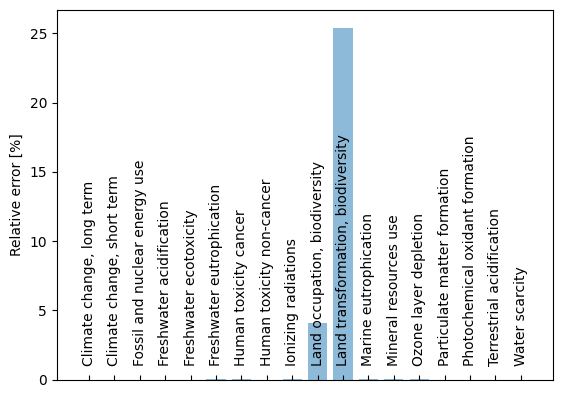

In [25]:
plot_comparison_bis(wind_impacts_midpoints, save=False)

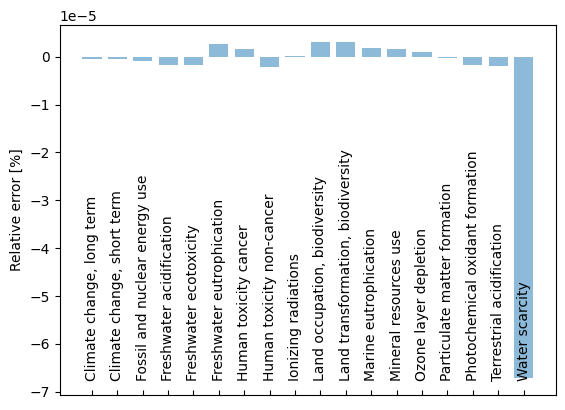

In [26]:
plot_comparison_bis(wind_impacts_midpoints_wo_direct, save=False)

## Finding where the problem comes from

### Elementary flows

In [ ]:
Em_wind = pd.DataFrame(Em[wind_id])
Em_wind.index.rename("uuid", inplace=True)
Em_wind = Em_wind.loc[~(Em_wind==0).all(axis=1)]
#display(Em_wind)

In [ ]:
Em_wind = pd.merge(left=df_eco_str, right=Em_wind, left_index=True, right_index=True)
Em_wind.drop(labels='id', inplace=True, axis=1)
Em_wind.rename(columns={wind_id:"wind_ES_moo"}, inplace=True)
display(Em_wind)

In [ ]:
def replace_empty_str(x):
    if x == "":
        return "unspecified"
    else:
        return x

In [ ]:
wind_ab_inventory = pd.read_csv("../ES_MOO_validation/AB_results/WT-2-MW_Inventory.csv")

In [ ]:
wind_ab_inventory[['comp', 'subcomp']] = wind_ab_inventory['categories'].str.split(',', 1, expand=True)
wind_ab_inventory['comp'] = wind_ab_inventory['comp'].map(lambda x: x.lstrip("('").rstrip("')"))
wind_ab_inventory['subcomp'] = wind_ab_inventory['subcomp'].map(lambda x: x.lstrip(" '").rstrip("')"))
wind_ab_inventory['subcomp'] = wind_ab_inventory['subcomp'].apply(lambda x: replace_empty_str(x))
wind_ab_inventory.drop(labels=["Unnamed: 0", "categories", "type", "database"], axis=1, inplace=True)
wind_ab_inventory.rename(columns={"wind turbine construction,\n2MW, onshore | wind turbine,\n2MW, onshore | GLO |\necoinvent3.8 cut-off":"wind_ab"}, inplace=True)
display(wind_ab_inventory)

In [ ]:
Em_wind_full = pd.merge(left=Em_wind, right=wind_ab_inventory, on=["name", "comp", "subcomp"], how="outer")

In [ ]:
display(Em_wind_full)

In [ ]:
number_of_digits = 3 # number of significant digits to account for when comparing the results
Em_wind_full.wind_ab = Em_wind_full.wind_ab.apply(lambda x: float(f'%.{number_of_digits}g' % x))
Em_wind_full.wind_ES_moo = Em_wind_full.wind_ES_moo.apply(lambda x: float(f'%.{number_of_digits}g' % x))

In [ ]:
Em_wind_full_differences = Em_wind_full[Em_wind_full.wind_ES_moo != Em_wind_full.wind_ab]

In [ ]:
Em_wind_full_differences["rel_error"] = (Em_wind_full_differences.wind_ES_moo - Em_wind_full_differences.wind_ab) / Em_wind_full_differences.wind_ab

In [ ]:
display(Em_wind_full_differences)

In [ ]:
Em_wind_full_differences[Em_wind_full_differences.name.str.contains("Transformation")]

The flows with the term "(non-use)" are not important because their characterization factor will be zero in IW+. Here for instance there is an issue in row 937 (Transformation, from traffic area, road network) for which there is a -100 factor difference, and the characterization factor in IW+ is -1.0611. However, all ODGs are below 1e-8, so this does not explain the strong difference in Land Transformation results which ODG was 1000.

In [ ]:
Em_wind_full[Em_wind_full.name.str.contains("Transformation")]

In [ ]:
Em_wind_full_differences[Em_wind_full_differences.rel_error <= 0]

In [ ]:
Em_wind_full_differences.rel_error.min(), Em_wind_full_differences.rel_error.max()

In [ ]:
Em_wind_full_differences[Em_wind_full_differences.rel_error == Em_wind_full_differences.rel_error.max()]

In [ ]:
# Number of differences between ecospold2matrix and AB
Em_wind_full_differences.shape[0]

In [ ]:
# Number of differences due to the fact that the flow is present in ecospold2matrix but absent in ab, the rest being a difference of values
Em_wind_full_differences.wind_ab.isnull().sum()

In [ ]:
# All the flows present in ab are also present in ecospold2matrix
Em_wind_full_differences.wind_ES_moo.isnull().sum()

In [ ]:
Em_wind.shape[0], wind_ab_inventory.shape[0]

### Characterization factors

In [ ]:
C_IW_AB = pd.read_excel("../ES_MOO_validation/AB_results/IW+ 2.0 Midpoint Land transformation, biodiversity.xlsx")

In [ ]:
C_IW.reset_index(inplace=True)
C_IW_LT = C_IW[((C_IW["Impact category"] == "Land transformation, biodiversity") & (C_IW["CF unit"] == "m2 arable land eq"))]
C_IW_LT.drop(columns=["Impact category", "CF unit"], inplace=True)
C_IW_LT = C_IW_LT.transpose()
C_IW_LT.rename({26:"CF"}, axis=1, inplace=True)

In [ ]:
C_IW_LT_non_zero = C_IW_LT[C_IW_LT.CF != 0.0]

In [ ]:
display(C_IW_LT_non_zero)

In [ ]:
C_IW_LT_wind = pd.merge(left=C_IW_LT_non_zero, right=Em_wind, left_index=True, right_index=True)

In [ ]:
C_IW_AB[['comp', 'subcomp']] = C_IW_AB['Category'].str.split(',', 1, expand=True)
C_IW_AB['comp'] = C_IW_AB['comp'].map(lambda x: x.lstrip("('").rstrip("')"))
C_IW_AB['subcomp'] = C_IW_AB['subcomp'].map(lambda x: x.lstrip(" '").rstrip("')"))
C_IW_AB['subcomp'] = C_IW_AB['subcomp'].apply(lambda x: replace_empty_str(x))

In [ ]:
C_IW_LT_wind = pd.merge(left=C_IW_LT_wind, right=C_IW_AB, left_on=["name", "comp", "subcomp"], right_on=["Name", "comp", "subcomp"])
C_IW_LT_wind.drop(columns=["Name", "Category", "Unit"], inplace=True)

In [ ]:
C_IW_LT_wind.rename({"CF":"CF_moo", "Amount":"CF_AB"}, axis=1, inplace=True)

In [ ]:
number_of_digits = 5 # number of significant digits to account for when comparing the results
C_IW_LT_wind.CF_AB = C_IW_LT_wind.CF_AB.apply(lambda x: float(f'%.{number_of_digits}g' % x))
C_IW_LT_wind.CF_moo = C_IW_LT_wind.CF_moo.apply(lambda x: float(f'%.{number_of_digits}g' % x))

In [ ]:
C_IW_LT_wind_diff = C_IW_LT_wind[C_IW_LT_wind.CF_moo != C_IW_LT_wind.CF_AB][["name","CF_moo", "CF_AB", "wind_ES_moo"]]

In [ ]:
display(Em_wind)

In [ ]:
display(C_IW_LT_wind_diff)

In [ ]:
(C_IW_LT_wind_diff.CF_moo * C_IW_LT_wind_diff.wind_ES_moo).sum() - (C_IW_LT_wind_diff.CF_AB * C_IW_LT_wind_diff.wind_ES_moo).sum()
# keep index in previous merges to keep uuid information, then keep wind_AB in C_IW_LT_wind_diff to have a better estimation of the related error

In [ ]:
wind_impacts_midpoints_LT = wind_impacts_midpoints[wind_impacts_midpoints["Impact category"] == "Land transformation, biodiversity"]
(wind_impacts_midpoints_LT.es_moo - wind_impacts_midpoints_LT.AB).iloc[0]

# Brightway2

In [ ]:
import bw2data as bd

In [ ]:
bd.projects.set_current("ecoinvent3.8")

In [ ]:
ei = bd.Database("ecoinvent3.8 cut-off")

In [ ]:
# act is the wind turbine activity
act = [i for i in ei.search('wind turbine construction, 2MW, onshore', limit=1000) if ('wind turbine construction, 2MW, onshore' == i.as_dict()['name'])][0]

In [ ]:
act["filename"]

In [ ]:
# We can recover an activity from its uuid using brightway as follows
[i for i in ei if (wind_id+".spold" == i["filename"])]

In [ ]:
wind_id